# Question 2

## (a)

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
%matplotlib inline
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
from sklearn.metrics import silhouette_score

In [2]:
#load all the data into Python
sub_a = np.load("science2k-doc-word.npy")
sub_b = np.load("science2k-word-doc.npy")

#use dataframe to read 
titles = pd.read_table('science2k-titles.txt').values
vocab = pd.read_table('science2k-vocab.txt').values

In [3]:
#compare different k values 
#use sum of squared distance as a metric to determine best k values 
inertia_sub_a = []
for k in range(2, 26):
    km = KMeans(n_clusters = k, n_jobs = -1).fit(sub_a)
    inertia_sub_a.append(km.inertia_)

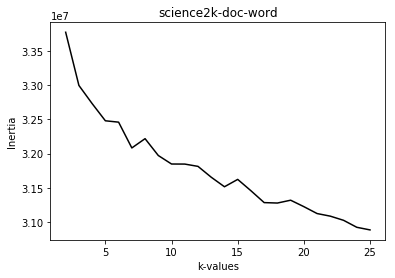

In [4]:
#plot inertia vs. k-values for each file 
fig, ax = plt.subplots()
ax.plot(range(2,26),inertia_sub_a, color = 'black')

plt.title("science2k-doc-word")
plt.xlabel("k-values")
plt.ylabel("Inertia")
plt.show()

From the graph above, we can see that k = 10 is the best k-value.

In [5]:
#select a k-value 

#run k-means with k-value = 10
km = KMeans(n_clusters = 10, random_state=0, n_jobs = -1).fit(sub_a)
labels = km.labels_
clusters = km.cluster_centers_

In [6]:
#report the top 10 farthest words 
word_mean = np.mean(sub_a,axis = 0)
word_distances = np.argsort(clusters-word_mean,axis=1)[:,::-1]
for d in range(word_distances.shape[0]):
    cloest_words = []
    for x in word_distances[d,:10]:
        cloest_words.append(vocab[x][0])
    print(cloest_words)
    print("")

['phase', 'values', 'cells', 'point', 'found', 'temperature', 'north', 'order', 'respectively', 'right']

['bound', 'recognition', 'alleles', 'charge', 'possibility', 'ice', 'box', 'today', 'findings', 'positive']

['rates', 'photosynthetic', 'extended', 'breakup', 'spins', 'agricultural', 'equator', 'mark', 'california', 'convection']

['system', 'animals', 'brain', 'new', 'results', 'high', 'substantial', 'hiv', 'western', 'atoms']

['cells', 'case', 'lower', 'subunit', 'studies', 'seen', 'scale', 'turn', 'colleagues', 'first']

['gene', 'found', 'provided', 'experiment', 'development', 'groups', 'concentrations', 'group', 'enhanced', 'regions']

['science', 'time', 'shown', 'data', 'long', 'sequences', 'new', 'cells', 'expression', 'years']

['cdtl', 'bacteria', 'fixation', 'gst', 'confirmed', 'amino', 'calculate', 'growing', 'telomerase', 'theres']

['amino', 'single', 'phys', 'temperature', 'dependent', 'host', 'occurs', 'experiments', 'involved', 'time']

['state', 'major', 'avai

In [7]:
#report top 10 documents that falls closest to each cluster
for i in range(10):
    closest = np.argsort(euclidean_distances(sub_a[labels == i],clusters[i].reshape(1,-1)),axis=0)[:10]
    print([titles[each][0,0] for each in closest])
    print("----------------")

['Evidence for a Low-Density Universe from the Relative Velocities of Galaxies', 'Mutations in SDHD, A Mitochondrial Complex II Gene, in Hereditary Paraganglioma', 'Single-File Diffusion of Colloids in One-Dimensional Channels', 'A Population of Murine gd T Cells That Recognize an Inducible MHC Class Ib Molecule', 'Oxygen Isotopes and Emerald Trade Routes since Antiquity', 'Ambipolar Pentacene Field-Effect Transistors and Inverters', "Solar Missions Brighten NASA's Hopes for Space Science Research", 'Some like It Hot', 'Function of PI3Kg in Thymocyte Development, T Cell Activation, and Neutrophil Migration', 'The Green Revolution Strikes Gold']
----------------
['Surface Expression of HLA-E, An Inhibitor of Natural Killer Cells, Enhanced by Human Cytomegalovirus gpUL40', 'Restoration-A Misnomer?', 'Planetary Science: A Space Odyssey', 'Direct Observation of Dynamical Heterogeneities in Colloidal Hard-Sphere Suspensions', 'Formation of Cyclic Water Hexamer in Liquid Helium: The Smallest

### The algorithm captured documents by similarity, grouping similar documents together in a cluster. It is useful when there are no labelled data, and you still need to seperate the data into groups somehow. When we want to classify documents by the number of words that overlap in each document, and clustering the documents with more overlapping words together.

## (b)

In [8]:
#compare different k values 
#use sum of squared distance as a metric to determine best k values 
inertia_sub_b = []
for k in range(2, 26):
    km = KMeans(n_clusters = k, n_jobs = -1).fit(sub_b)
    inertia_sub_b.append(km.inertia_)

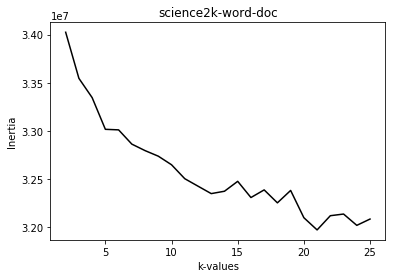

In [9]:
#plot inertia vs. k-values for each file 
fig, ax = plt.subplots()
ax.plot(range(2,26),inertia_sub_b, color = 'black')

plt.title("science2k-word-doc")
plt.xlabel("k-values")
plt.ylabel("Inertia")
plt.show()

From the graph above, k = 10 as well

In [10]:
#select a k-value 
#run k-means with k-value = 10
km = KMeans(n_clusters = 10, random_state=0, n_jobs = -1).fit(sub_b)
labels = km.labels_
clusters = km.cluster_centers_

In [11]:
#report top 10 documents that falls closest to each cluster
for i in range(10):
    closest = np.argsort(euclidean_distances(sub_b[labels == i],clusters[i].reshape(1,-1)),axis=0)[:10]
    print([vocab[each][0][0] for each in closest])
    print("----------------")

['see', 'year', 'nature', 'water', 'usa', 'sequence', 'present', 'change', 'based', 'complex']
----------------
['sleep', 'played', 'paul', 'really', 'bull', 'fuel', 'extracted', 'tuning', 'heterozygous', 'filter']
----------------
['cross', 'difference', 'body', 'make', 'observations', 'events', 'materials', 'individual', 'quantum', 'references']
----------------
['interaction', 'likely', 'interactions', 'institute', 'end', 'compared', 'times', 'systems', 'related', 'min']
----------------
['human', 'control', 'years', 'three', 'results', 'model', 'observed', 'mice', 'different', 'genes']
----------------
['death', 'stable', 'transgenic', 'magnitude', 'contact', 'common', 'occurred', 'increasing', 'stage', 'six']
----------------
['cells']
----------------
['science', 'cells']
----------------
['science', 'means', 'mhc', 'purified', 'leading', 'help', 'simulations', 'represent', 'soil', 'sections']
----------------
['features', 'channel', 'back', 'bars', 'animal', 'tissue', 'smaller',

In [12]:
#report the top 10 farthest words 
word_mean = np.mean(sub_b,axis = 0)
word_distances = np.argsort(clusters-word_mean,axis=1)[:,::-1]
for d in range(word_distances.shape[0]):
    cloest_docs = []
    for x in word_distances[d,:10]:
        cloest_docs.append(titles[x][0])
    print(cloest_docs)
    print("")

['Roles of PLC-b2 and -b3 and PI3Kg in Chemoattractant-Mediated Signal Transduction', 'Requirement for DARPP-32 in Progesterone-Facilitated Sexual Receptivity in Female Rats and Mice', 'Function of an Axonal Chemoattractant Modulated by Metalloprotease Activity', 'Central Role for G Protein-Coupled Phosphoinositide 3-Kinase g in Inflammation', 'Perception of Brassinosteroids by the Extracellular Domain of the Receptor Kinase BRI1', 'A Primitive T Cell-Independent Mechanism of Intestinal Mucosal IgA Responses to Commensal Bacteria', 'Balancing the Science Budget', 'Seeing the Herpesvirus Capsid at 8.5 $\\AA$', 'Proximity of Chromosomal Loci That Participate in Radiation-Induced Rearrangements in Human Cells', 'Synaptic Assembly of the Brain in the Absence of Neurotransmitter Secretion']

['Dialog on Depression', 'Subduction and Slab Detachment in the Mediterranean-Carpathian Region', 'From Turin to Stockholm via St. Louis and Rio de Janeiro', 'Corrections and Clarifications: Unearthing 

### The algorithm captured documents by similarity in term-wise, grouping similar documents together in a cluster. It is useful when there are no labelled data, and you still need to seperate the data into groups somehow. When we want to classify documents by term-wise for each document, and clustering the documents together.